In [1]:
import sys
from train_lexical import extract_classifiers
from train_captions import transfer_weights
from train_captions import init_net
from eval.captioner import *
from eval import eval_sentences
import argparse
import pdb
from utils.config import *
import numpy as np

#model='coco_learnClassifier_voc72klabel_glove_sgd_iter_55000.caffemodel'
model='coco_directfc7_voc72klabel_glove_sgd_iter_55000.caffemodel'
image_prototxt='dcc_vgg.471.deploy.prototxt'
language_prototxt='deploy.coco_directfc7_voc72klabel_shared_glove.prototxt'
vocab='surf_intersect_glove.txt'
precomputed = '/yy2/lisaanne/vgg_features/h5Files/coco2014_cocoid.val_val.txt0_fullLabel2.h5'

model_weights = caption_weights_root + model
image_model = models_root + image_prototxt
language_model = models_root + language_prototxt
vocab = vocab_root + vocab
precomputed_feats = lexical_features_root + precomputed

In [2]:
#image = 'val2014/COCO_val2014_000000552186.jpg'
image = 'val2014/COCO_val2014_000000579402.jpg'
captioner = Captioner(model_weights, image_model, language_model, vocab, precomputed_feats=precomputed_feats,
                      prev_word_restriction=True, image_feature='data', 
                      language_feature='probs')


In [5]:
model_bad='coco_learnClassifier_voc72klabel_glove_sgd_iter_55000.caffemodel'
model_weights = caption_weights_root + model_bad
captioner_bad = Captioner(model_weights, image_model, language_model, vocab, precomputed_feats=precomputed_feats,
                      prev_word_restriction=True, image_feature='data', 
                      language_feature='probs')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image_root = '../../data/coco/coco/images/'

In [14]:
def eval_image(cap, image, analyze_word=None, im=False):
    descriptor = cap.compute_descriptors('', [image], 1)
    probs_im, probs_lm, probs_multi, sent = cap.debug_generation(descriptor, temp=float('inf'))
    if im:
        img=mpimg.imread(image_root + image)
        imgplot = plt.imshow(img)
    print 'Caption: ', ' '.join([captioner.vocab[i] for i in sent])
    print '\nPredicted image words: %s' %' '.join([captioner.vocab[i] for i in np.argsort(probs_im)[-10:]])
    print '\t\t Image prob \t Language prob \t Multimodal prob \t Most likely lm word'
    for t, word in enumerate(sent):
        print "Word: %s \t %f \t %f \t %f \t %s(%f)" %(captioner.vocab[word], probs_im[word], 
                                                       probs_lm[t,word], probs_multi[t, word], 
                                                       captioner.vocab[np.argmax(probs_lm[t,:])],
                                                       np.max(probs_lm[t,:]))
    if analyze_word:
        word_idx = captioner.vocab.index(analyze_word)
        print "a(%s|image): %f" %(analyze_word, probs_im[word_idx])
        for t in range(len(sent)):
            print "a(%s|language) at t = %d: %f" %(analyze_word, t, probs_lm[t,word_idx])

Computing descriptors for images 0-0 of 1
1/1 done after word 9
Caption:  a couple of zebras standing next to each other <EOS>

Predicted image words: near background front field close next two picture zebras standing
		 Image prob 	 Language prob 	 Multimodal prob 	 Most likely lm word
Word: a 	 -4.762770 	 12.378212 	 7.615442 	 half-hourly(13.199512)
Word: couple 	 -1.781839 	 4.710512 	 2.928673 	 boltzmann(7.723449)
Word: of 	 -5.265965 	 14.089411 	 8.823446 	 of(14.089411)
Word: zebras 	 -0.603133 	 8.364242 	 7.761109 	 colspan(11.605090)
Word: standing 	 0.409241 	 9.079286 	 9.488526 	 milosevic(16.355207)
Word: next 	 -0.929136 	 14.847329 	 13.918194 	 in(18.081060)
Word: to 	 -6.852434 	 23.795979 	 16.943544 	 to(23.795979)
Word: each 	 -6.124700 	 19.114086 	 12.989387 	 each(19.114086)
Word: other 	 -4.430750 	 21.921360 	 17.490610 	 other(21.921360)
Word: <EOS> 	 -5.097790 	 17.189018 	 12.091228 	 <EOS>(17.189018)
a(zebra|image): -2.444785
a(zebra|language) at t = 0:

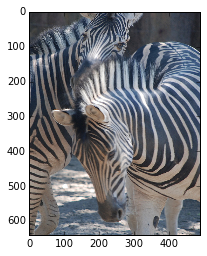

In [15]:
#zebra image (zebra successfully generated by jointly trained model)
eval_image(captioner, 'val2014/COCO_val2014_000000579402.jpg', analyze_word='zebra')
print '########################################################################################'
eval_image(captioner_bad, 'val2014/COCO_val2014_000000579402.jpg', im = True, analyze_word='zebra')

Computing descriptors for images 0-0 of 1
0/1 done after word 9
Caption:  a man riding a bicycle with a dog on a

Predicted image words: woman riding parked standing next bike bicycle street man people
		 Image prob 	 Language prob 	 Multimodal prob 	 Most likely lm word
Word: a 	 -3.963486 	 12.378212 	 8.414726 	 half-hourly(13.199512)
Word: man 	 0.248926 	 4.929056 	 5.177982 	 boltzmann(7.723449)
Word: riding 	 -0.919134 	 6.177955 	 5.258821 	 accuses(12.446506)
Word: a 	 -3.963486 	 18.744865 	 14.781380 	 a(18.744865)
Word: bicycle 	 0.075626 	 8.063393 	 8.139019 	 riderless(11.090518)
Word: with 	 -4.921254 	 14.376510 	 9.455256 	 france(16.177225)
Word: a 	 -3.963486 	 13.526828 	 9.563342 	 a(13.526828)
Word: dog 	 -3.129347 	 6.875010 	 3.745664 	 dog(6.875010)
Word: on 	 -4.534138 	 11.280780 	 6.746642 	 slobodan(12.969028)
Word: a 	 -3.963486 	 15.003934 	 11.040448 	 its(17.206373)
a(bus|image): -7.940450
a(bus|language) at t = 0: 2.818008
a(bus|language) at t = 1: 2.

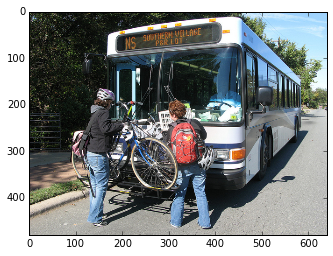

In [16]:
#bus image (bus not generated by jointly trained model)
im = 'val2014/COCO_val2014_000000019523.jpg'
w = 'bus'
eval_image(captioner, im, analyze_word=w)
print '########################################################################################'
eval_image(captioner_bad, im, im = True, analyze_word=w)

Computing descriptors for images 0-0 of 1
1/1 done after word 9
Caption:  a kitchen with a sink and a counter top <EOS>

Predicted image words: top sitting bathroom industrial white large room counter sink kitchen
		 Image prob 	 Language prob 	 Multimodal prob 	 Most likely lm word
Word: a 	 -3.861983 	 12.378212 	 8.516229 	 half-hourly(13.199512)
Word: kitchen 	 0.862999 	 3.029963 	 3.892962 	 boltzmann(7.723449)
Word: with 	 -5.383570 	 12.454459 	 7.070889 	 with(12.454459)
Word: a 	 -3.861983 	 10.701404 	 6.839420 	 a(10.701404)
Word: sink 	 -0.465478 	 3.535904 	 3.070426 	 puncher(6.848173)
Word: and 	 -4.229592 	 12.505037 	 8.275446 	 36.0(13.967219)
Word: a 	 -3.861983 	 9.646147 	 5.784163 	 a(9.646147)
Word: counter 	 -0.737374 	 3.372978 	 2.635604 	 sunbird(8.535836)
Word: top 	 -1.397081 	 9.601610 	 8.204529 	 topix(13.294333)
Word: <EOS> 	 -5.129487 	 13.124148 	 7.994662 	 <EOS>(13.124148)
a(microwave|image): -8.049571
a(microwave|language) at t = 0: 2.807416
a(mic

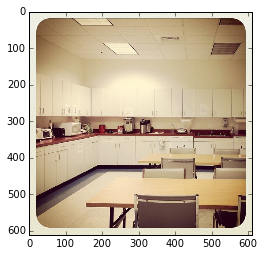

In [18]:
#microwave image (bus not generated by jointly trained model)
im = 'val2014/COCO_val2014_000000122869.jpg'
w = 'microwave'
eval_image(captioner, im, analyze_word=w)
print '########################################################################################'
eval_image(captioner_bad, im, im = True, analyze_word=w)